# Tree Order Optimization and Visualization

This notebook demonstrates the process of optimizing the order of taxa in a set of phylogenetic trees, visualizing the results, and analyzing per-taxa distances between adjacent trees. The workflow includes:

1. Data preparation and parsing trees
2. Computing per-taxa distances
3. Mapping distances to colors and widths for visualization
4. Local optimization of tree order
5. Visualization of the optimized trees and their relationships

In [21]:
%load_ext autoreload
%autoreload 2
from brancharchitect.io import parse_newick
from copy import deepcopy as copy
import os
from brancharchitect.plot.circular_bezier_trees import (
    plot_tree_row_with_beziers_and_distances
)
def make_gradient_highlight_dict(
    branches, color, gradient_end, width=8, elevation=True, label_bold=False, label_color=None
):
    return {
        edge: {
            "highlight_color": color,
            "stroke_width": width,
            "gradient_end": gradient_end,
            "use_elevation": elevation,
            "label_bold": label_bold,
            "label_color": label_color,
        }
        for edge in branches
    }


# ------------------- Data Preparation -------------------
# Parse your trees
TREES_ORDER = ['C2', 'Y', 'X', 'C1', 'B1', 'B2', 'O', 'Z']
trees = parse_newick(
    "(O,(((C2,Y)C2Y,((B2,C1),B1)),(X,Z)));"
    "(O,(((C2,Y),((B2,C1),B1)),(X,Z)));"
    + "(O,(((C2,Y),((B2,C1),B1)),(X,Z)));"
    + "(O,(((C1,(X,Z)),((B2,C2),B1)),Y));"
    + "(O,(((C1,(X,Z)),((B2,C2),B1)),Y));"
    + "(O,(((C1,(X,Z)),((B2,C2),B1)),Y));",
    order=TREES_ORDER,
)

trees_1 = copy(trees)
trees_2 = copy(trees)
trees_3 = copy(trees)

# Define and create output directory
output_dir = os.path.expanduser("~/Documents/Reports/final_phylo_movies/figures")
os.makedirs(output_dir, exist_ok=True)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/Users/berksakalli/Projects/BranchArchitect/brancharchitect/plot/circular_bezier_trees.py:200: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(pad=0.22)


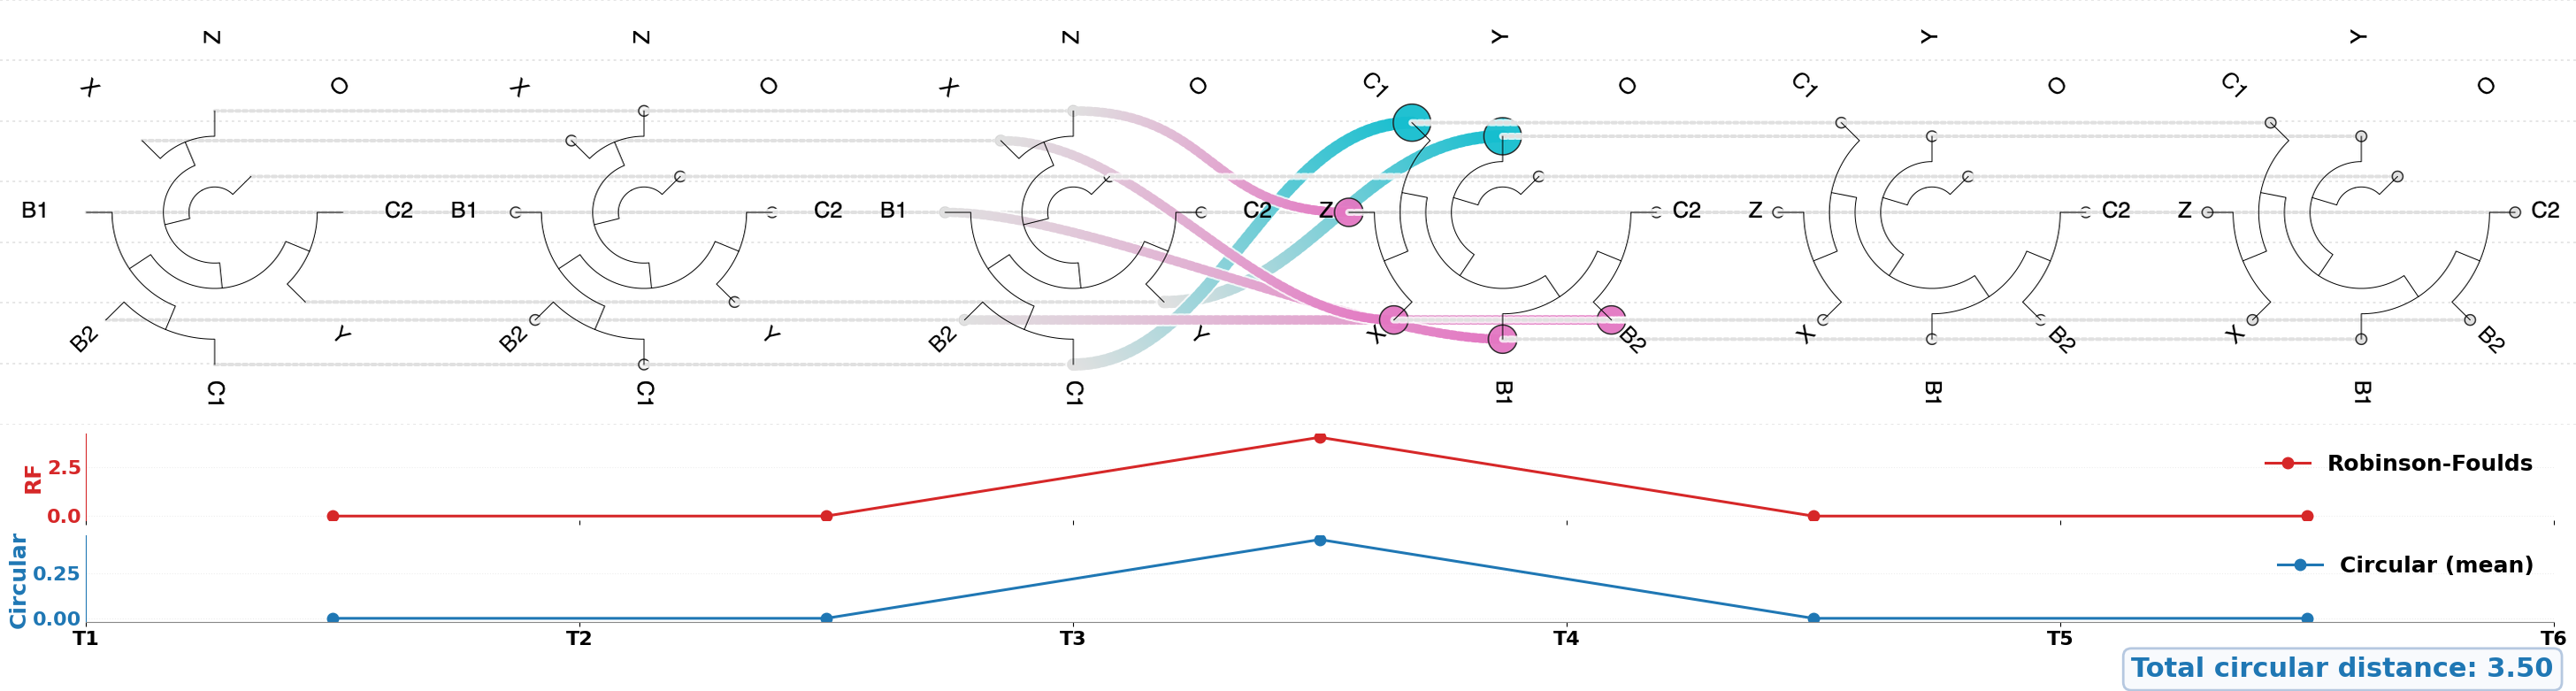

In [35]:
%load_ext autoreload
%autoreload 2
pdf_path = f"{output_dir}/without_rotation.png"
# ------------------- Visualizati on -------------------
svg_element = plot_tree_row_with_beziers_and_distances(
    trees_1,
    size=480,
    cmap_name="tab10",
    output_path=pdf_path,
    leaf_font_size=25,
)

/Users/berksakalli/Projects/BranchArchitect/brancharchitect/plot/circular_bezier_trees.py:200: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(pad=0.22)


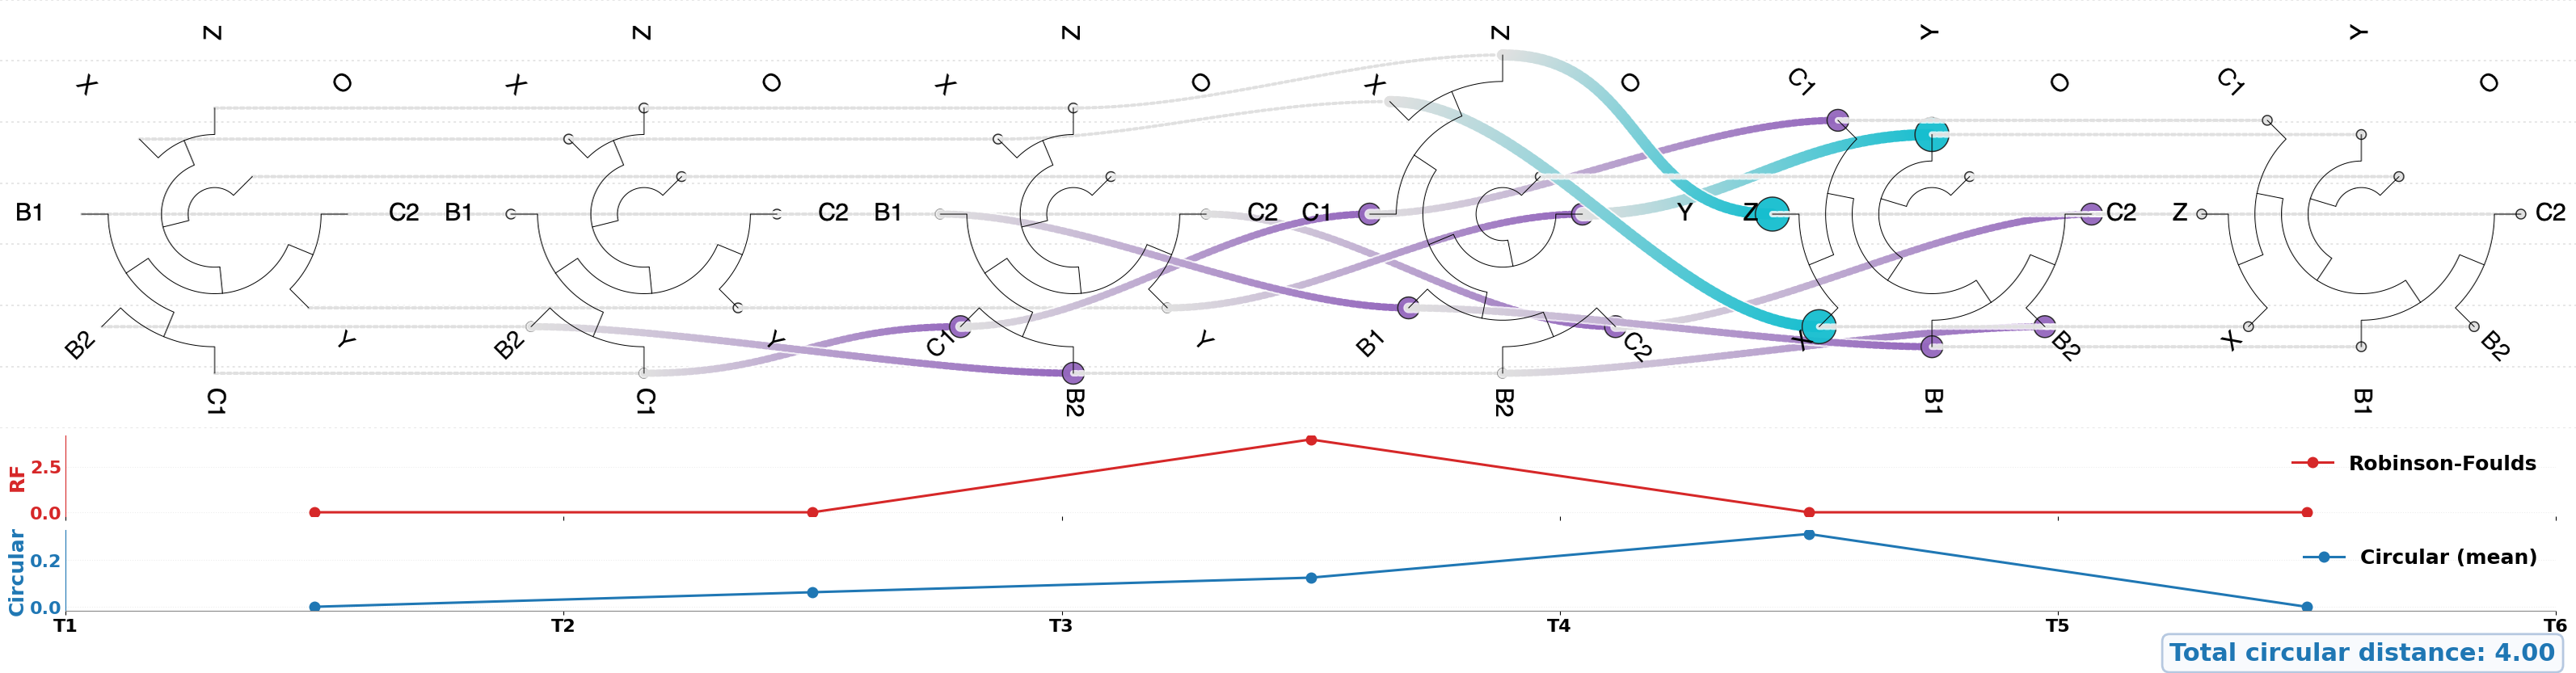

In [36]:
from brancharchitect.leaforder.tree_order_optimisation_classic import (
    improve_single_pair_classic,
)

improve_single_pair_classic(
    trees_2[3],
    trees[2],
)

improve_single_pair_classic(
    trees_2[2],
    trees[3],
)

improve_single_pair_classic(
    trees_2[3],
    trees_2[2],
)

improve_single_pair_classic(
    trees_2[2],
    trees_2[3],
)

pdf_path = f"{output_dir}/with_mid_rotation.png"

svg_element = plot_tree_row_with_beziers_and_distances(
    trees_2,
    size=530,
    cmap_name="tab10",
    output_path=pdf_path,
    leaf_font_size=30,
)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
(B1, B2, C1, C2, X, Y, Z)
(B2, C1)


/Users/berksakalli/Projects/BranchArchitect/brancharchitect/plot/circular_bezier_trees.py:200: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(pad=0.22)


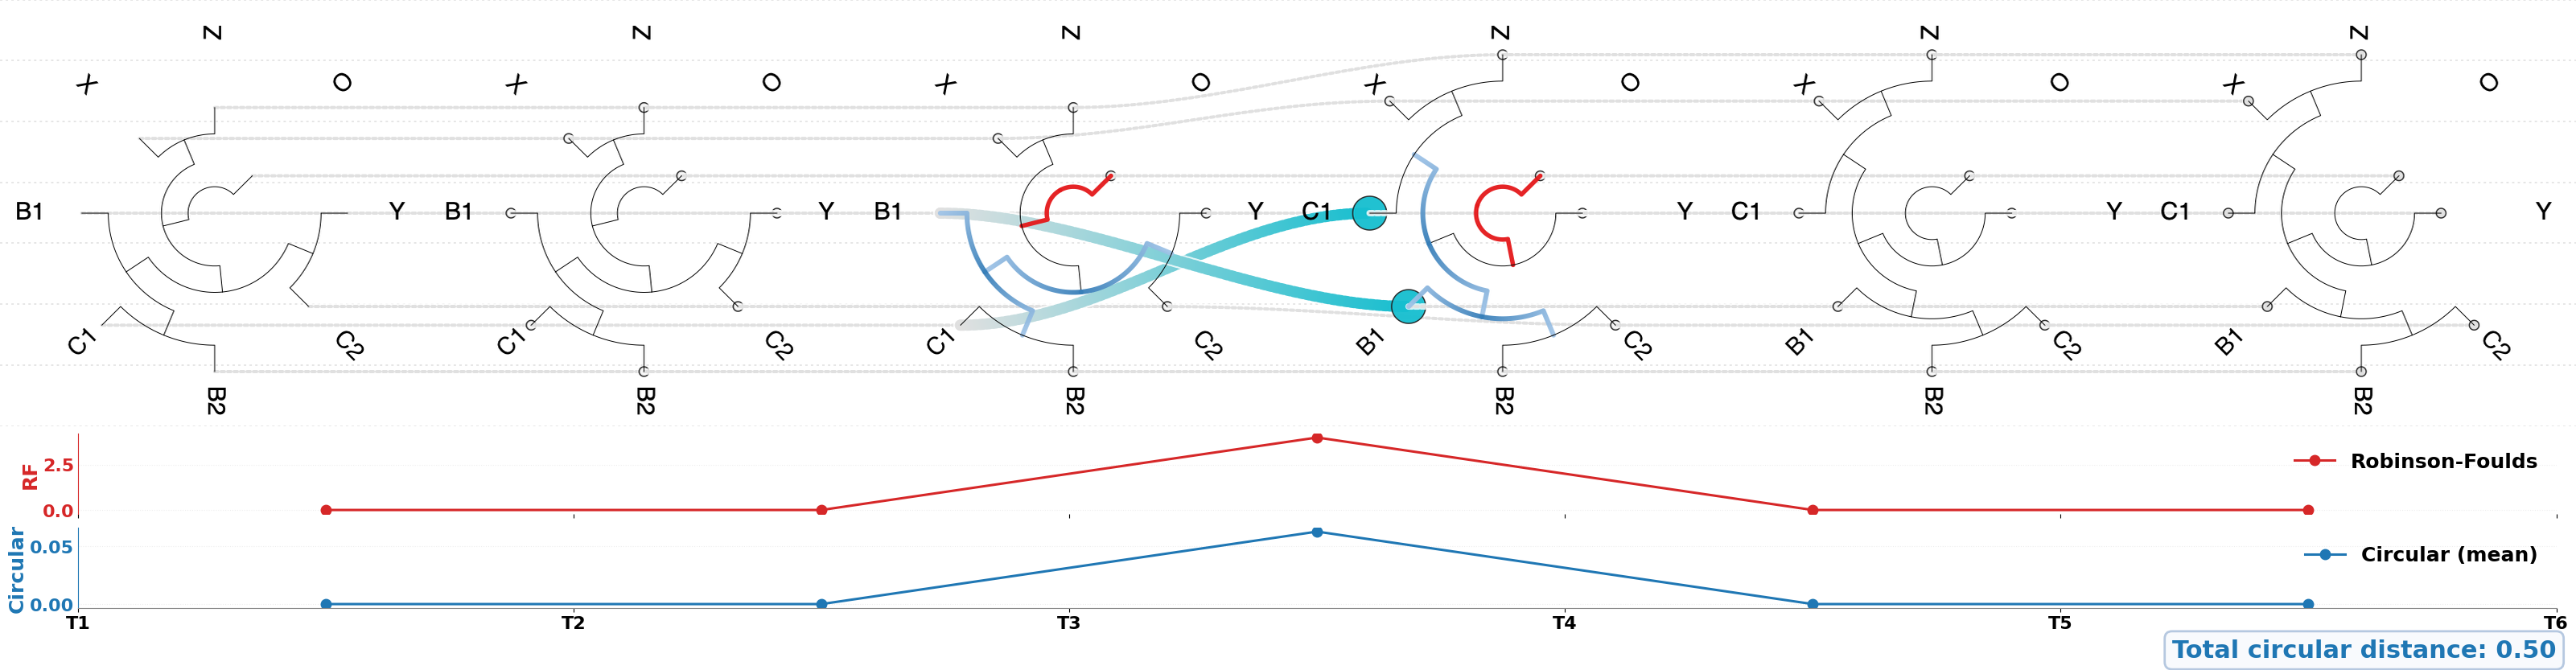

In [37]:
# Reload modules for development
%load_ext autoreload
%autoreload 2

from brancharchitect.leaforder.tree_order_optimiser import TreeOrderOptimizer
from brancharchitect.leaforder.rotation_functions import (
    get_unique_splits,
    get_s_edge_splits,
)

pdf_path = f"{output_dir}/with_forward_propagation_algorithm.png"
optimiser = TreeOrderOptimizer(trees_3)
optimiser.optimize(n_iterations=5, bidirectional=True)

# --- Highlight branches with gradient and elevation effects ---




# Assign internal node names for unique identification
for tree in trees_3:
    tree.assign_internal_node_names()

# Compute split differences and s-edge splits between tree 3 and tree 4
unique_splits_3 = get_unique_splits(trees_3[3], trees_3[2])
unique_splits_4 = get_unique_splits(trees_3[2], trees_3[3])
s_edge_splits_3 = get_s_edge_splits(trees_3[3], trees_3[2])
s_edge_splits_4 = get_s_edge_splits(trees_3[2], trees_3[3])


def get_branches_for_splits(tree, split_set):
    branches = []
    for split in split_set:
        node = tree.find_node_by_split(split)
        node = node.parent
        if node is not None:
            for child in node.children:
                branches.append((node.name, child.name))
    return branches


highlight_branches_3 = get_branches_for_splits(trees_3[2], unique_splits_3.atom())
highlight_branches_4 = get_branches_for_splits(trees_3[3], unique_splits_4.atom())
highlight_sedge_branches_3 = get_branches_for_splits(trees_3[2], s_edge_splits_3)
highlight_sedge_branches_4 = get_branches_for_splits(trees_3[3], s_edge_splits_4)

# Example: unique splits in blue gradient, s-edge splits in orange/green gradient, bold/colored labels for highlights
highlight_colors = [
    {},
    {},
    {
        **make_gradient_highlight_dict(
            highlight_branches_3, "#377eb8", "#a1c4e7", width=6, label_bold=True, label_color="#377eb8"
        ),
        **make_gradient_highlight_dict(
            highlight_sedge_branches_3, "#e41a1c", "#e41a1c", width=5.5, label_bold=True, label_color="#e41a1c"
        ),
    },
    {
        **make_gradient_highlight_dict(
            highlight_branches_4, "#377eb8", "#a1c4e7", width=6, label_bold=True, label_color="#377eb8"
        ),
        **make_gradient_highlight_dict(
            highlight_sedge_branches_4, "#e41a1c", "#e41a1c", width=5.5, label_bold=True, label_color="#e41a1c"
        ),
    },
    {},
    {},
]

highlight_branches = [
    [],
    [],
    highlight_branches_3 + highlight_sedge_branches_3,
    highlight_branches_4 + highlight_sedge_branches_4,
    [],
    [],
]
highlight_widths = [0.0, 0.0, 8.0, 8.0, 0.0, 0.0]

svg_element = plot_tree_row_with_beziers_and_distances(
    trees_3,
    size=530,
    highlight_branches=highlight_branches,
    # highlight_width=highlight_widths,
    highlight_colors=highlight_colors,
    cmap_name="tab10",
    output_path=pdf_path,
    leaf_font_size=30,
)

In [38]:
import os
import tempfile
import sys
from reportlab.platypus import (
    SimpleDocTemplate,
    Paragraph,
    Spacer,
    Image,
    HRFlowable,
)
from reportlab.lib.styles import getSampleStyleSheet
from reportlab.lib.enums import TA_LEFT
from reportlab.lib.units import cm
from reportlab.lib.pagesizes import A4, portrait
from reportlab.lib import colors
from reportlab.graphics.shapes import Drawing, Rect, String
from reportlab.lib.colors import HexColor

# Add this near your other imports
from PIL import Image as PILImage  # Import PIL Image separately

# --- Dependency Handling ---
from pdf2image import convert_from_path

DEFAULT_POPPLER_PATH = None  # User should provide if not in PATH
# --- Configuration Constants (Adjust as needed) ---
IMAGE_DPI = 400  # Increased DPI for potentially better quality
PAGE_MARGIN = 2.2 * cm  # Increased margin for clarity
MAIN_SECTION_SPACING = 1.5 * cm  # More space between figure sections
TITLE_IMAGE_SPACING = 0.5 * cm  # More space between title and image
IMAGE_DESC_SPACING = 0.5 * cm  # More space between image and description
HR_LINE_COLOR = colors.lightgrey
SEQUENCE_IMG_WIDTH_FACTOR = 0.85  # Slightly less width for more whitespace
TITLE_FONT_NAME = "Helvetica-Bold"
TITLE_FONT_SIZE = 11
BODY_FONT_NAME = "Times-Roman"
BODY_FONT_SIZE = 10  # Slightly larger body text
ERROR_TEXT_COLOR = HexColor("#e41a1c")
LEGEND_ROW_HEIGHT = 0.8 * cm  # More vertical space per legend row
LEGEND_VERTICAL_PADDING = 0.3 * cm  # More padding above/below legend
LEGEND_X_START_FACTOR = 0.0
LEGEND_SWATCH_WIDTH = 15
LEGEND_SWATCH_HEIGHT = 8  # Slightly taller swatch
LEGEND_TEXT_OFFSET_X = 5  # Slightly more offset
LEGEND_FONT_NAME = "Helvetica"
LEGEND_FONT_SIZE = 7  # Slightly larger legend text
LEGEND_TEXT_COLOR = colors.black

# --- Define COLOR_LEGEND_ITEMS relevant to this plot ---
COLOR_LEGEND_ITEMS = [
    (HexColor("#e41a1c"), "Common Split (Adjacent Highlight)"),  # Red Highlight
    (
        HexColor("#66c2a5"),
        "Unique Adjacent Split / Atom (T1)",
    ),  # Teal Highlight / Enclosure Fill
    (
        HexColor("#fc8d62"),
        "Unique Adjacent Split / Atom (T2)",
    ),  # Orange Highlight / Enclosure Fill
    (
        HexColor("#377eb8"),
        "Other Unique Split (T1)",
    ),  # Blue Highlight (if used distinctly)
]


def setup_reportlab_doc(output_filename):
    """Creates and configures a ReportLab SimpleDocTemplate."""
    doc = SimpleDocTemplate(
        output_filename,
        pagesize=portrait(A4),
        leftMargin=PAGE_MARGIN,
        rightMargin=PAGE_MARGIN,
        topMargin=PAGE_MARGIN,
        bottomMargin=PAGE_MARGIN,
    )
    styles = getSampleStyleSheet()
    return doc, styles


def define_text_styles(styles):
    """Defines and returns custom text styles."""
    style_title = styles["h3"]
    style_title.fontName = TITLE_FONT_NAME
    style_title.fontSize = TITLE_FONT_SIZE
    style_title.alignment = TA_LEFT
    style_title.spaceAfter = TITLE_IMAGE_SPACING

    style_body = styles["BodyText"]
    style_body.fontName = BODY_FONT_NAME
    style_body.fontSize = BODY_FONT_SIZE
    style_body.alignment = TA_LEFT
    style_body.spaceAfter = MAIN_SECTION_SPACING

    style_error = styles["Code"]
    style_error.textColor = ERROR_TEXT_COLOR
    style_error.fontSize = BODY_FONT_SIZE

    return style_title, style_body, style_error


def convert_pdf_page_to_image(pdf_path, page_num, temp_dir, dpi, poppler_path):
    """Converts a specific page of a PDF to a PNG image using pdf2image."""
    try:
        images = convert_from_path(
            pdf_path,
            dpi=dpi,
            output_folder=temp_dir,
            fmt="png",
            poppler_path=poppler_path,
            thread_count=2,
            first_page=page_num,
            last_page=page_num,
        )
        if not images:
            raise RuntimeError(f"pdf2image returned empty list for page {page_num}")
        return images[0]
    except Exception as e:
        print(
            f"  ERROR converting page {page_num} of '{os.path.basename(pdf_path)}': {e}",
            file=sys.stderr,
        )
        return None


def create_reportlab_image_flowable(img_pil, key, available_width, error_style):
    """Creates a ReportLab Image or error Paragraph flowable with scaling."""
    if img_pil is None:
        return Paragraph(f"[Image conversion failed for '{key}']", error_style)

    temp_img_path = img_pil.filename
    try:
        img_width_px, img_height_px = img_pil.size
        if img_width_px <= 0 or img_height_px <= 0:
            raise ValueError("Image dimensions are zero or negative")
        aspect = img_height_px / float(img_width_px)

        # Apply consistent scaling factor for all figures
        scale_factor = SEQUENCE_IMG_WIDTH_FACTOR  # Use 0.95 for all

        img_reportlab_width = available_width * scale_factor
        img_reportlab_height = img_reportlab_width * aspect
        print(
            f"  Scaling '{key}' image to {scale_factor * 100:.0f}% width ({img_reportlab_width:.1f} points)"
        )

        img_flowable = Image(
            temp_img_path, width=img_reportlab_width, height=img_reportlab_height
        )
        img_flowable.hAlign = "CENTER"
        return img_flowable

    except Exception as e:
        print(
            f"  ERROR processing image data for '{key}' from '{os.path.basename(temp_img_path)}': {e}",
            file=sys.stderr,
        )
        return Paragraph(f"[Error processing image data for '{key}']", error_style)


def create_color_legend_drawing(width):
    """Creates the ReportLab Graphics Drawing object for the color legend (vertical)."""
    num_items = len(COLOR_LEGEND_ITEMS)
    if num_items == 0:
        return Drawing(width, 0)

    total_legend_height = (LEGEND_ROW_HEIGHT * num_items) + (
        LEGEND_VERTICAL_PADDING * 2
    )
    d = Drawing(width, total_legend_height)

    current_y = total_legend_height - LEGEND_VERTICAL_PADDING - (LEGEND_ROW_HEIGHT / 2)
    legend_x = width * LEGEND_X_START_FACTOR

    for item_color, item_text in COLOR_LEGEND_ITEMS:
        swatch_y = current_y - LEGEND_SWATCH_HEIGHT / 2
        swatch = Rect(
            legend_x,
            swatch_y,
            LEGEND_SWATCH_WIDTH,
            LEGEND_SWATCH_HEIGHT,
            fillColor=item_color,
            strokeColor=colors.black,
            strokeWidth=0.5,
        )
        d.add(swatch)

        text_x = legend_x + LEGEND_SWATCH_WIDTH + LEGEND_TEXT_OFFSET_X
        text_y = swatch_y + (LEGEND_SWATCH_HEIGHT / 2) - (LEGEND_FONT_SIZE * 0.35)
        legend_string = String(text_x, text_y, item_text)
        legend_string.fontName = LEGEND_FONT_NAME
        legend_string.fontSize = LEGEND_FONT_SIZE
        legend_string.fillColor = LEGEND_TEXT_COLOR
        legend_string.textAnchor = "start"
        d.add(legend_string)

        current_y -= LEGEND_ROW_HEIGHT
    return d


# --- Story Building Functions ---


def _add_legend_section(story, available_width):
    """Adds the color legend to the story."""
    print("  Creating color legend drawing...")
    color_legend_drawing = create_color_legend_drawing(available_width)
    if color_legend_drawing.height > 0:
        story.append(color_legend_drawing)
        story.append(Spacer(1, MAIN_SECTION_SPACING))


def _add_figure_section(story, image_flowables, key, title, description, styles):
    """Adds a generic figure section (Title, Image, Description) to the story."""
    style_title, style_body, style_error = styles
    story.append(Paragraph(title, style_title))
    if key in image_flowables:
        story.append(image_flowables[key])
        story.append(Spacer(1, IMAGE_DESC_SPACING))
    else:
        story.append(Paragraph(f"[Image '{key}' not available]", style_error))
        story.append(Spacer(1, IMAGE_DESC_SPACING))
    story.append(Paragraph(description, style_body))


def build_reportlab_story(
    image_flowables, fig_titles, fig_descriptions, styles, available_width
):
    """Constructs the ReportLab story list based on available figures."""
    story = []
    all_styles = define_text_styles(styles)
    num_figures = len(fig_titles)

    _add_legend_section(story, available_width)
    if story and isinstance(story[-1], Spacer):
        story.append(
            HRFlowable(
                width="100%",
                thickness=0.5,
                color=HR_LINE_COLOR,
                spaceBefore=0.1 * cm,
                spaceAfter=MAIN_SECTION_SPACING,
            )
        )

    # Single loop to add all figures using generic keys
    for i in range(num_figures):
        # Generate the key like "figure_A", "figure_B", etc.
        key = f"figure_{chr(ord('A') + i)}"
        if key in image_flowables:
            title = (
                fig_titles[i] or f"Figure {chr(ord('A') + i)}"
            )  # Use provided title or default
            description = fig_descriptions[i] or ""  # Use provided description
            _add_figure_section(
                story, image_flowables, key, title, description, all_styles
            )

            # Add horizontal line between figures if not the last one
            if i < num_figures - 1:
                story.append(
                    HRFlowable(
                        width="100%",
                        thickness=0.5,
                        color=HR_LINE_COLOR,
                        spaceBefore=0.1 * cm,
                        spaceAfter=MAIN_SECTION_SPACING,
                    )
                )
        else:
            # Handle case where image flowable wasn't created (e.g., file missing)
            print(
                f"Warning: Image flowable for key '{key}' not found. Skipping section.",
                file=sys.stderr,
            )
            # Optionally add a placeholder paragraph
            story.append(
                Paragraph(
                    f"[Figure {chr(ord('A') + i)} - Image Missing]", all_styles[2]
                )
            )  # Use error style
            if i < num_figures - 1:
                story.append(
                    HRFlowable(
                        width="100%",
                        thickness=0.5,
                        color=HR_LINE_COLOR,
                        spaceBefore=0.1 * cm,
                        spaceAfter=MAIN_SECTION_SPACING,
                    )
                )
    return story

# --- Main Orchestration Function ---
def create_vertical_composite_pdf(
    figure_files, output_filename, fig_titles, fig_descriptions, poppler_path=None
):
    """Creates a composite PDF figure with color legend, images, and descriptions."""
    num_figures = len(figure_files)
    if not (num_figures == len(fig_titles) == len(fig_descriptions)):
        print(
            "Error: Number of input PDF files, titles, and descriptions must match.",
            file=sys.stderr,
        )
        return False
    if num_figures == 0:
        print("Error: No input files provided.", file=sys.stderr)
        return False

    doc, styles = setup_reportlab_doc(output_filename)
    _, _, style_error = define_text_styles(styles)
    image_flowables = {}
    missing_files = []

    # Always use generic keys like "figure_A", "figure_B", ...
    keys = [f"figure_{chr(ord('A') + i)}" for i in range(num_figures)]
    print(f"  Assigning keys: {keys}")

    print(
        f"--- Starting Vertical Composite PDF Generation: '{output_filename}' ({num_figures} figures) ---"
    )
    actual_poppler_path = poppler_path or DEFAULT_POPPLER_PATH

    try:
        with tempfile.TemporaryDirectory() as temp_dir:
            print(f"  Using temporary directory: {temp_dir}")

            # Process each input file
            for i, filename in enumerate(figure_files):
                key = keys[i]
                print(
                    f"\nProcessing: Figure {chr(ord('A') + i)} ('{os.path.basename(filename)}') as '{key}'"
                )

                if not os.path.exists(filename):
                    print(f"  ERROR: File not found: {filename}", file=sys.stderr)
                    missing_files.append(filename)
                    image_flowables[key] = Paragraph(
                        f"[Missing image: {os.path.basename(filename)}] ({key})",
                        style_error,
                    )
                    continue

                # Check if file is PNG or PDF
                file_ext = os.path.splitext(filename)[1].lower()

                # For PNG files, load directly with PIL
                if file_ext == ".png":
                    try:
                        # Open the PNG with PIL
                        print(f"  Opening PNG file: {filename}")
                        img_pil = PILImage.open(filename)

                        # Save a copy in the temp directory with explicit format
                        temp_img_path = os.path.join(
                            temp_dir, f"temp_{os.path.basename(filename)}"
                        )
                        print(f"  Saving temp copy to: {temp_img_path}")

                        # Force to RGB mode if RGBA to avoid transparency issues
                        if img_pil.mode == "RGBA":
                            print("  Converting RGBA image to RGB")
                            rgb_img = PILImage.new("RGB", img_pil.size, (255, 255, 255))
                            rgb_img.paste(
                                img_pil, mask=img_pil.split()[3]
                            )  # Use alpha as mask
                            img_pil = rgb_img

                        img_pil.save(temp_img_path, format="PNG")
                        img_pil.filename = temp_img_path

                        # Verify the saved file exists
                        if not os.path.exists(temp_img_path):
                            raise FileNotFoundError(
                                f"Failed to save temporary image to {temp_img_path}"
                            )

                        print(f"  Successfully processed PNG: {img_pil.size}")
                    except Exception as e:
                        print(
                            f"  ERROR: Failed to process PNG file {filename}: {e}",
                            file=sys.stderr,
                        )
                        import traceback

                        traceback.print_exc()
                        img_pil = None
                else:
                    # For PDF files, use the existing conversion function
                    img_pil = convert_pdf_page_to_image(
                        filename, 1, temp_dir, IMAGE_DPI, actual_poppler_path
                    )

                # Continue with creating the flowable
                image_flowables[key] = create_reportlab_image_flowable(
                    img_pil, key, doc.width, style_error
                )

            # After all files are processed, build the story and PDF
            print("\nBuilding final PDF document...")
            story = build_reportlab_story(
                image_flowables, fig_titles, fig_descriptions, styles, doc.width
            )

            try:
                doc.build(story)
                print(f"\nPDF built successfully: {output_filename}")
                return True
            except Exception as e:
                print(f"\nError building PDF: {e}", file=sys.stderr)
                import traceback

                traceback.print_exc()
                return False

    except Exception as e:
        print("\n--- PDF Generation Failed ---\n", file=sys.stderr)
        print(
            f"ERROR: Could not build ReportLab PDF '{output_filename}'.",
            file=sys.stderr,
        )
        print(f"Reason: {e}", file=sys.stderr)
        import traceback

        traceback.print_exc()
        return False

**Legend for Highlighted Branches:**

- <span style="color:#377eb8;font-weight:bold">Blue edges</span>: Branches unique to Tree 3 (or Tree 4) compared to its neighbor (unique splits).
- <span style="color:#e41a1c;font-weight:bold">Red edges</span>: S-edge branches (splits that are present in both trees but with different arrangements).

Highlighted branch labels are also bold and colored to match their edge for emphasis.

<b>Figure Summary:</b>

This figure illustrates the optimization of taxon order in a set of phylogenetic trees and highlights the structural differences between adjacent trees. Branches unique to each tree (unique splits) are shown with <font color="#377eb8"><b>blue edges</b></font>, while s-edge branches (splits present in both trees but with different arrangements) are shown with <font color="#e41a1c"><b>red edges</b></font>. Highlighted branch labels are bold and colored to match their corresponding edge for emphasis.

The optimization process minimizes the sum of circular distances for each taxon between adjacent trees, as shown in the accompanying distance plots. This approach helps to visually identify regions of topological change and the taxa most affected by reordering.

<i>Indices:</i> <i>T</i><sub>3</sub> and <i>T</i><sub>4</sub> refer to the third and fourth trees in the sequence, respectively. Unique splits and s-edge splits are computed between these trees to highlight their differences.

This visualization and summary enable a clear, publication-ready comparison of tree topologies and the effects of order optimization.

In [19]:


# In your main code, update these:
figure_titles = [
    "Figure A: Input Trees for Comparison",
    "Figure B: Identifying Lattice Edges",
    "Figure C: Analyzing Partition Sets (Atoms) within Lattice Edges",
]

figure_a_description = """"""

figure_b_description = """"""

figure_c_description = """"""

figure_d_description = """"""

figure_descriptions = [
    figure_a_description,
    figure_b_description,
    figure_c_description,
]

In [39]:
if __name__ == "__main__":
    if "output_dir" not in locals() and "output_dir" not in globals():
        # Define it here if necessary, but ideally it's inherited
        output_dir = os.path.expanduser(
            "~/Documents/Reports/final_phylo_movies/figures"
        )
        print(
            f"Warning: 'output_dir' not found in scope, using default: {output_dir}",
            file=sys.stderr,
        )

    base_figure_dir = output_dir  # Use the directory where the notebook saved the PDFs

    if not os.path.isdir(base_figure_dir):
        print(
            f"ERROR: Input figure directory not found: {base_figure_dir}",
            file=sys.stderr,
        )
        raise FileNotFoundError(f"Input figure directory not found: {base_figure_dir}")

    # Output directory for the composite PDF (e.g., same as script location)
    composite_output_dir = os.path.join(base_figure_dir, "composite_figures")
    os.makedirs(composite_output_dir, exist_ok=True)

    input_filenames = [
        "without_rotation.png",
        "with_forward_propagation_algorithm.png",
        "with_forward_propagation_algorithm.png",
    ]
    input_files = [os.path.join(base_figure_dir, fname) for fname in input_filenames]

    # --- Define titles and descriptions for the included figures ---
    # Ensure these lists have the same number of elements as input_files (3 in this case)
    figure_titles = [
        "Figure A: Input Trees for Comparison",
        "Figure B: Identifying Lattice Edges",
        "Figure C: Analyzing Partition Sets (Atoms) within Lattice Edges",
    ]

    # --- Define the output filename for the composite PDF ---
    output_pdf_filename = os.path.join(
        composite_output_dir, "composite_rotatation.pdf"
    )

    # --- Verification ---
    print(f"Attempting to create vertical composite PDF: {output_pdf_filename}")
    print("Using input files generated by this notebook:")

    for f in input_files:
        print(f"  - {f}")

    # Check if all input files exist
    all_files_exist = True
    missing_files_list = []

    for fpath in input_files:
        if not os.path.exists(fpath):
            print(f"  ERROR: Input file not found: {fpath}", file=sys.stderr)
            missing_files_list.append(fpath)
            all_files_exist = False

    if not all_files_exist:
        print("\\nAborting PDF generation due to missing input files.", file=sys.stderr)

        raise FileNotFoundError(f"Missing input files: {', '.join(missing_files_list)}")
    else:
        print("\\nAll input files found.")

    my_poppler_path = None  # Set this if Poppler is not in system PATH

    success = create_vertical_composite_pdf(
        input_files,
        output_pdf_filename,
        figure_titles,
        figure_descriptions,
        poppler_path=my_poppler_path,
    )
    # --- Define the output filename for the composite PDF ---
    output_pdf_filename = os.path.join("./", "composite_rotation.pdf")
    success = create_vertical_composite_pdf(
        input_files,
        output_pdf_filename,
        figure_titles,
        figure_descriptions,
        poppler_path=my_poppler_path,
    )

    if success:
        print(f"\\nSuccessfully created: {output_pdf_filename}")
    else:
        print(f"\\nFailed to create: {output_pdf_filename}", file=sys.stderr)

Attempting to create vertical composite PDF: /Users/berksakalli/Documents/Reports/final_phylo_movies/figures/composite_figures/composite_rotatation.pdf
Using input files generated by this notebook:
  - /Users/berksakalli/Documents/Reports/final_phylo_movies/figures/without_rotation.png
  - /Users/berksakalli/Documents/Reports/final_phylo_movies/figures/with_forward_propagation_algorithm.png
  - /Users/berksakalli/Documents/Reports/final_phylo_movies/figures/with_forward_propagation_algorithm.png
\nAll input files found.
  Assigning keys: ['figure_A', 'figure_B', 'figure_C']
--- Starting Vertical Composite PDF Generation: '/Users/berksakalli/Documents/Reports/final_phylo_movies/figures/composite_figures/composite_rotatation.pdf' (3 figures) ---
  Using temporary directory: /var/folders/4b/d3dqt2g92wqbp31k199b7msh0000gn/T/tmp071yi7k6

Processing: Figure A ('without_rotation.png') as 'figure_A'
  Opening PNG file: /Users/berksakalli/Documents/Reports/final_phylo_movies/figures/without_rot